from https://www.tensorflow.org/tutorials/load_data/images

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

# 샘플 데이터 다운로드

In [5]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True,
                                   cache_dir='.'
                                   )
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [6]:
print(data_dir)

datasets/flower_photos


# 영상 파일 리스트 구하기

In [8]:
file_list = list(data_dir.glob('*/*.jpg'))
print(len(file_list))
print(file_list[:5])

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'), PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'), PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'), PosixPath('datasets/flower_photos/roses/15699509054_d3e125286f_n.jpg'), PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg')]
3670


# 영상 파일 하나 로딩


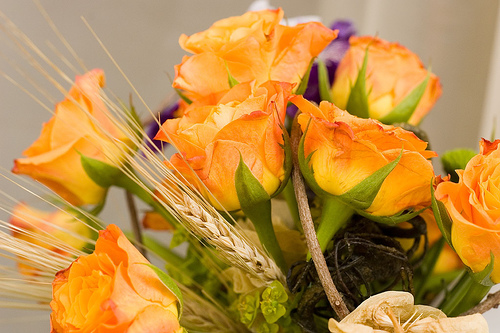

In [11]:
file_list = list(data_dir.glob('*/*.jpg'))
PIL.Image.open(str(file_list[1]))

# tensorflow.Dataset으로 파일들 읽기

## train 데이터

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=32)

print(train_ds.class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## validation 데이터

In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128, 128),
  batch_size=32)

print(val_ds.class_names)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# 영상 데이터 보기

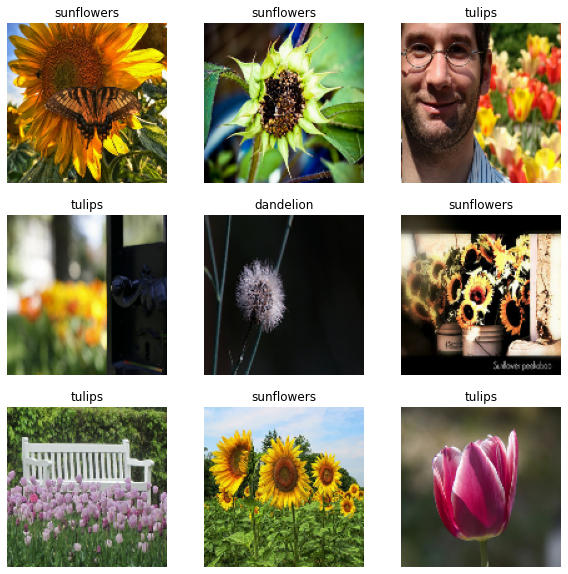

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

# Normalizing

In [20]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.958027


In [22]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

normalized_ds = train_ds.map(lambda x, y: (normalize_img(x, y)))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9979588
